In [1]:
import csv
import matplotlib.pyplot as plt
import requests
from scipy import stats
import pandas as pd
from time import strftime
from datetime import datetime

import os
import numpy as np

In [2]:
#read the data in
data = pd.read_csv("condensedata.csv").T

#keep only the columns I'm working on
data = data[[3,4,5]]

#drop the first row with column names
data = data.drop(data.index[0])

#reset the index so it's easier to get the year
data = data.reset_index()

#rename the columns to something easier to understand
data.columns = ["Year","Tax on Int Trade","Tax Revenue","Surface Area"]

#drop empty data fields
data = data.dropna()

# #check out the data
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47 entries, 12 to 58
Data columns (total 4 columns):
Year                47 non-null object
Tax on Int Trade    47 non-null object
Tax Revenue         47 non-null object
Surface Area        47 non-null object
dtypes: object(4)
memory usage: 1.8+ KB


In [3]:
quakes = pd.read_csv("earthquakedata.csv")
quakestime = pd.DataFrame(quakes)
quakestime["Time"] = pd.to_datetime(quakestime["Time"],unit='ms')
quakestime = pd.DataFrame(quakestime)
quakestime["Time"] = quakestime["Time"].astype("str")
quakestime["Year"] = pd.DatetimeIndex(quakestime["Time"]).year
quakestime = quakestime[["Year","Magnitude"]]
maxquake = quakestime.groupby("Year")
maxquake = maxquake.max()
maxquake = maxquake.reset_index()
maxquake = maxquake[(maxquake["Year"] > 1971) & (maxquake["Year"]<2019)]
maxquake["Year"] = maxquake["Year"].astype(str)
all_data = pd.merge(data,maxquake,on="Year")

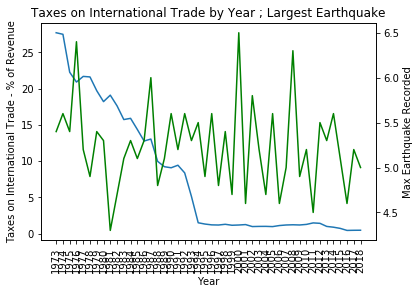

In [4]:
y = all_data["Tax on Int Trade"]
x = all_data["Year"]
y2 = all_data["Magnitude"]
tick_locations = [value for value in x]

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(x, y)
ax2.plot(x,y2,'g-')
ax1.set_ylabel("Taxes on International Trade - % of Revenue")
ax1.set_xlabel("Year")
ax1.set_title("Taxes on International Trade by Year ; Largest Earthquake")
ax1.set_xticklabels(all_data["Year"],rotation="vertical")
ax2.set_ylabel("Max Earthquake Recorded")
plt.show()

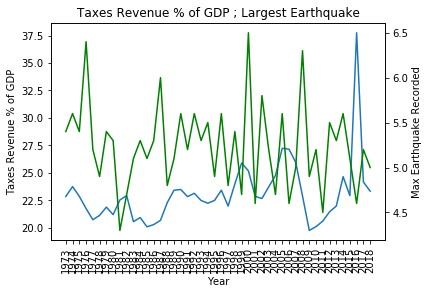

In [5]:
y = all_data["Tax Revenue"]
x = all_data["Year"]
y2 = all_data["Magnitude"]
tick_locations = [value for value in x]

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(x, y)
ax2.plot(x,y2,'g-')
ax1.set_ylabel("Taxes Revenue % of GDP")
ax1.set_xlabel("Year")
ax1.set_title("Taxes Revenue % of GDP ; Largest Earthquake")
ax1.set_xticklabels(all_data["Year"],rotation="vertical")
ax2.set_ylabel("Max Earthquake Recorded")
plt.show()

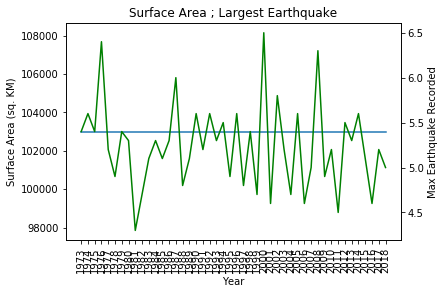

In [6]:
y = all_data["Surface Area"]
x = all_data["Year"]
y2 = all_data["Magnitude"]
tick_locations = [value for value in x]

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(x, y)
ax2.plot(x,y2,'g-')
ax1.set_ylabel("Surface Area (sq. KM)")
ax1.set_xlabel("Year")
ax1.set_title("Surface Area ; Largest Earthquake")
ax1.set_xticklabels(all_data["Year"],rotation="vertical")
ax2.set_ylabel("Max Earthquake Recorded")
plt.show()

Angie's Work Starts Here ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

In [7]:
#Make a dataframe with quakes and year
quakes = pd.read_csv("earthquakedata.csv")
quakestime = pd.DataFrame(quakes)
quakestime["Time"] = pd.to_datetime(quakestime["Time"],unit='ms')
quakestime = pd.DataFrame(quakestime)
quakestime["Time"] = quakestime["Time"].astype("str")
quakestime["Year"] = pd.DatetimeIndex(quakestime["Time"]).year
quakestime = quakestime[["Year","Magnitude"]]
quakestime.head()

,Year,Magnitude
0,2020,4.5
1,2020,4.5
2,2020,4.3
3,2020,4.2
4,2020,4.9


In [8]:
#dataframe with quakes above 6.1 magnitude and make the year into a string value for merging later on.
eq_above6 = quakestime.loc[quakestime['Magnitude'] >= 6.1]
eq_above6["Year"] = eq_above6["Year"].astype("str")
eq_above6


C:\Users\kenneth.knisley\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Year,Magnitude
576,2008,6.3
775,2000,6.5
780,2000,6.5
1073,1976,6.4
1158,1963,6.9


In [9]:
#Get angie's data columns and merge with the quakes above 6.1 dataframe

angies = pd.read_csv("condensedata.csv").T
angies = angies[[6,7,8]]
angies = angies.drop(angies.index[0])
angies = angies.reset_index()

angies.columns = ["Year","Lending/Borrowing","Domestic Savings","GDP/capita growth"]

#merge the earthquakes above 6.1 with a left join
angies_columns = pd.merge(angies, eq_above6, on="Year", how='left')
angies_columns


,Year,Lending/Borrowing,Domestic Savings,GDP/capita growth,Magnitude
0,1960,NaN,NaN,NaN,NaN
1,1961,NaN,NaN,-2.01288,NaN
2,1962,NaN,NaN,6.32475,NaN
3,1963,NaN,NaN,8.33794,6.9
4,1964,NaN,NaN,7.97974,NaN
...,...,...,...,...,...
56,2015,-0.211123,26.4945,3.38502,NaN
57,2016,12.2461,27.8153,5.87164,NaN
58,2017,1.79827,26.193,2.17876,NaN
59,2018,-0.677957,25.6876,1.60131,NaN


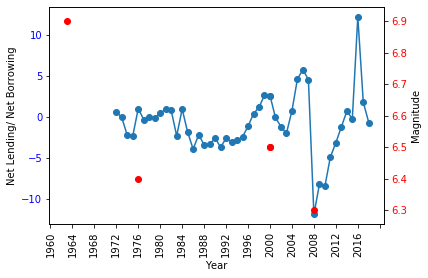

In [10]:
#Plot both the Net Lending/Net Borrowing and the earthquake on the same figure using twinx()
import matplotlib.ticker as mticker

fig, ax1 = plt.subplots()

ax1.set_xlabel("Year")
ax1.set_ylabel("Net Lending/ Net Borrowing")
ax1.plot(angies_columns['Year'], angies_columns['Lending/Borrowing'], marker='o')
ax1.tick_params(axis='y', labelcolor = 'blue')
plt.xticks(rotation=90)

ax2 = ax1.twinx()

ax2.set_ylabel("Magnitude")
ax2.scatter(angies_columns['Year'], angies_columns["Magnitude"], marker="o", color='red')
ax2.tick_params(axis = 'y', labelcolor = 'red')

myLocator = mticker.MultipleLocator(4)
ax1.xaxis.set_major_locator(myLocator)

plt.show()

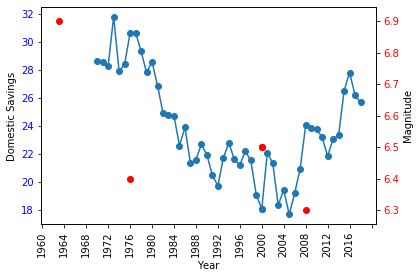

In [11]:
fig, ax1 = plt.subplots()

ax1.set_xlabel("Year")
ax1.set_ylabel("Domestic Savings")
ax1.plot(angies_columns['Year'], angies_columns['Domestic Savings'], marker='o')
ax1.tick_params(axis='y', labelcolor = 'blue')
plt.xticks(rotation=90)

ax2 = ax1.twinx()

ax2.set_ylabel("Magnitude")
ax2.scatter(angies_columns['Year'], angies_columns["Magnitude"], marker="o", color='red')

ax2.tick_params(axis = 'y', labelcolor = 'red')

myLocator = mticker.MultipleLocator(4)
ax1.xaxis.set_major_locator(myLocator)
plt.show()

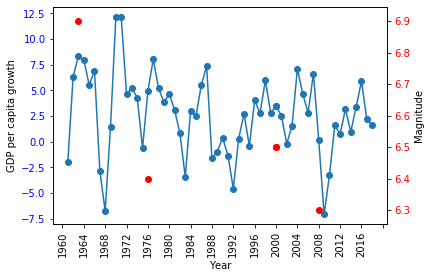

In [12]:
fig, ax1 = plt.subplots()

ax1.set_xlabel("Year")
ax1.set_ylabel("GDP per capita growth")
ax1.plot(angies_columns['Year'], angies_columns['GDP/capita growth'], marker='o', )
ax1.tick_params(axis='y', labelcolor = 'blue')
plt.xticks(rotation=90)

ax2 = ax1.twinx()

ax2.set_ylabel("Magnitude")
ax2.scatter(angies_columns['Year'], angies_columns["Magnitude"], marker="o", color='red')

ax2.tick_params(axis = 'y', labelcolor = 'red')

myLocator = mticker.MultipleLocator(4)
ax1.xaxis.set_major_locator(myLocator)

plt.show()